In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio

In [3]:
def load_json(group,student):
    with open(f'./data/all_json/{group}_{student}.json') as f:
        return json.load(f)
    
def load_images(group,student):
    return imageio.imread(f'./data/sequences/{group}-{student}.tif')

In [4]:
data = load_json(1,1)
images = load_images(1,1)

In [5]:
def show_image(group,student,frame, energy= None, threshold = None):
    plt.figure(figsize=(15,10))
    data = load_json(group,student)
    images = load_images(group,student)
    plt.imshow(images[frame-1])
    data = data['{}_{}_frame_{}'.format(group,student,frame)]
    for d in data["boxes"]:
        rect = plt.Rectangle((d[0], d[1]), d[2], d[3], fill=False, color='red')
        plt.gca().add_patch(rect)
    
    for d in data["cells"]:
        plt.plot(d[0], d[1], 'ro', markersize=2)

    if energy is not None and threshold is not None:
        for i , e in enumerate(energy):
            if e <threshold:
                plt.axvline(x=i, color='red')    
    plt.show()



In [6]:
background = np.zeros((10,images.shape[1],images.shape[2]))
images_mean = np.mean(images,axis=3)
background[0] = np.mean(images_mean[:1],axis=(0))

for i in range(1,10):
    background[i] = np.mean(images_mean[:10*i],axis=(0))


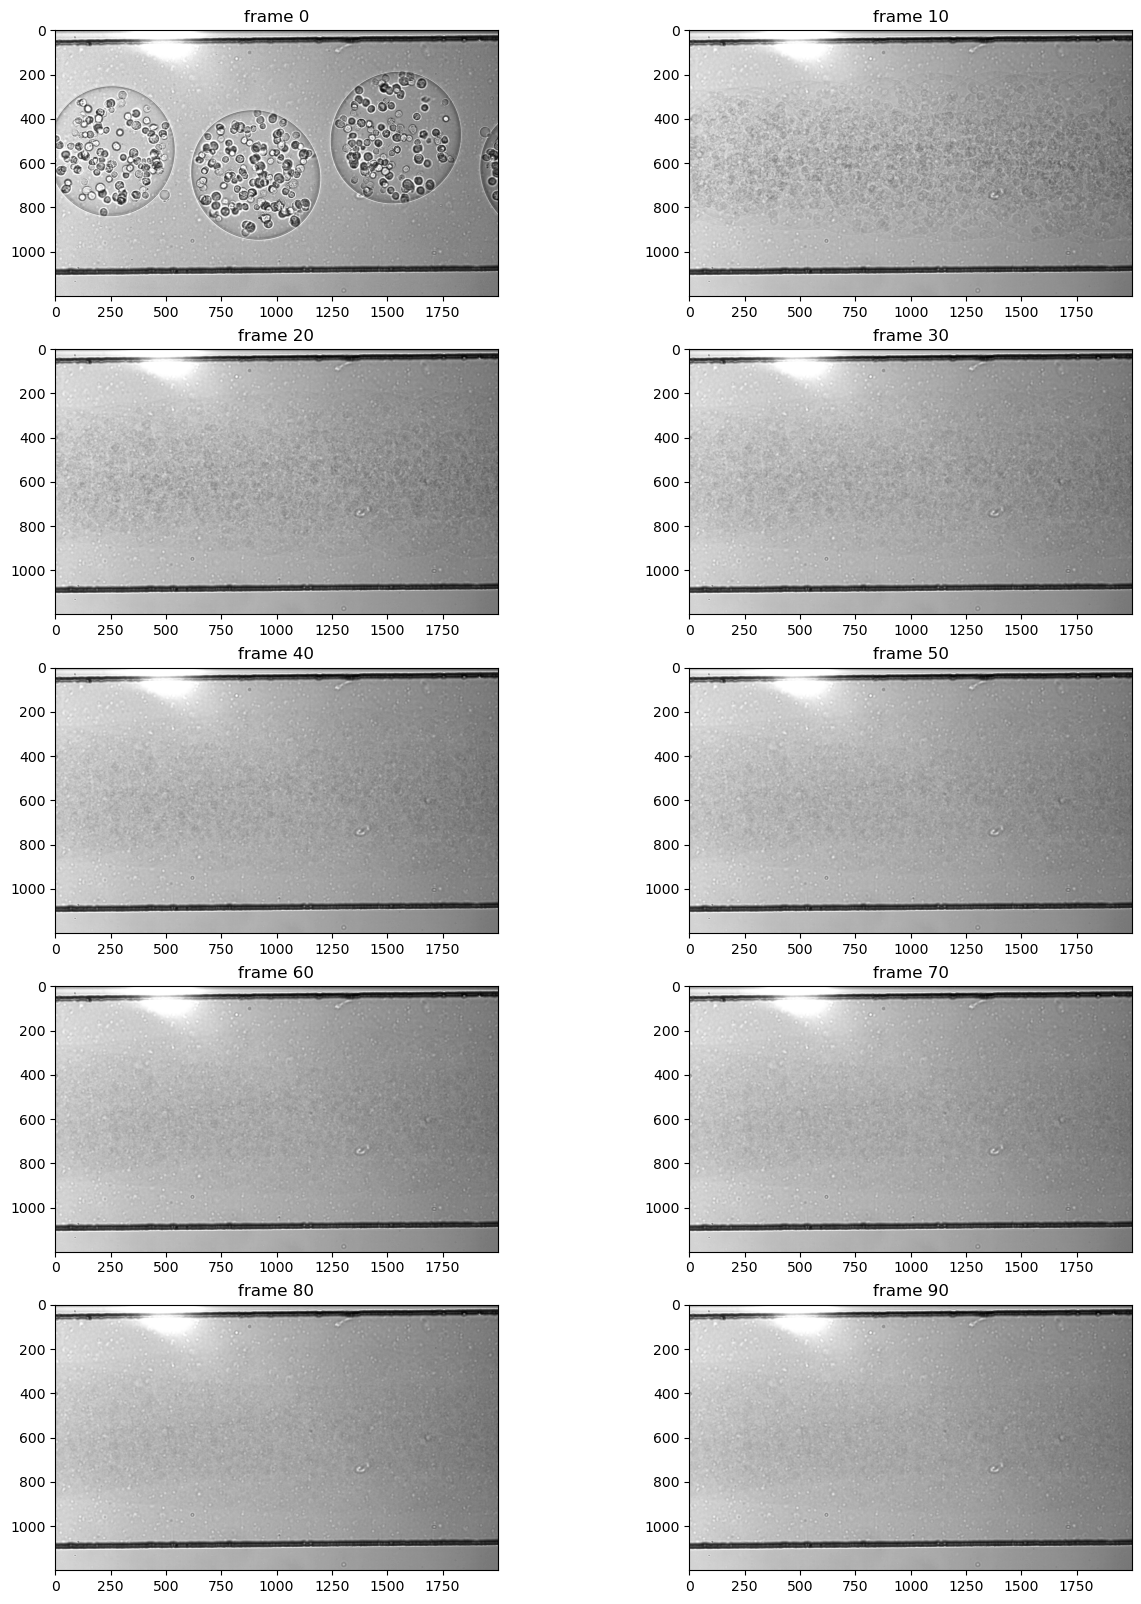

In [7]:
fig, axs = plt.subplots(5,2, figsize=(15,20))
for i in range(10):
    axs[i//2,i%2].imshow(background[i], cmap='gray')
    axs[i//2,i%2].set_title(f'frame {i*10}')
plt.show()

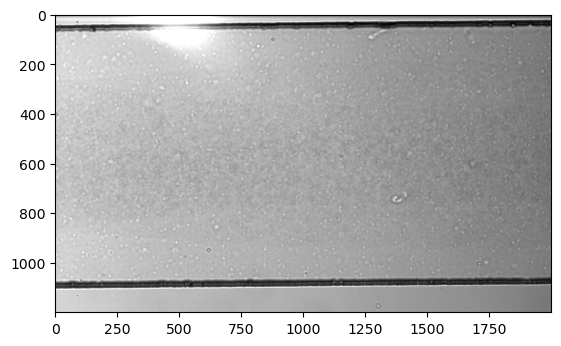

In [8]:
back = background[6]
plt.imshow(back, cmap='gray')

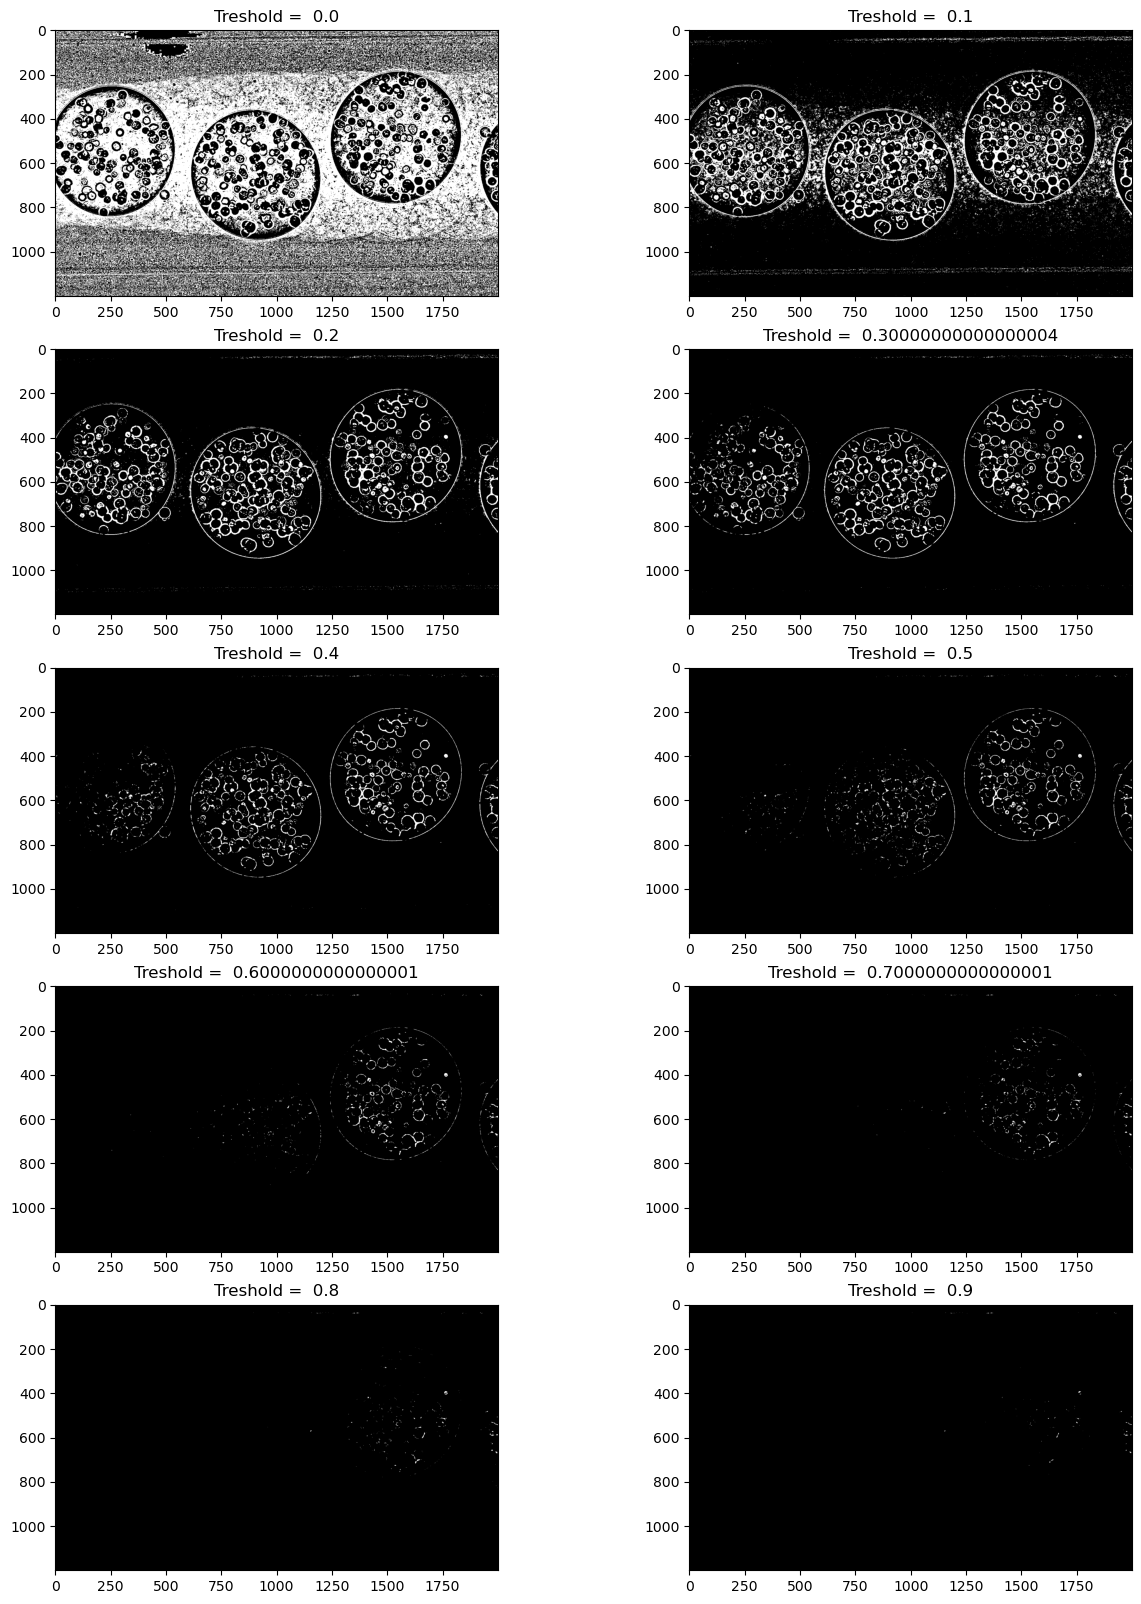

In [23]:
im = images[0]
im = np.mean(im,axis=2)

def get_mask(im,back,threshold=1):
    mask = np.zeros(im.shape)
    mask[im>back*(1+threshold)] = 1
    return mask

masks = np.zeros((10,im.shape[0],im.shape[1]))
for i in range(10):
    masks[i] = get_mask(im,back,threshold=0.1*i)

fig, axs = plt.subplots(5,2, figsize=(15,20))
for i in range(10):
    axs[i//2,i%2].imshow(masks[i], cmap='gray')
    axs[i//2,i%2].set_title(f'Treshold =  {0.1*i}')
